In [1]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("C:/Users/Shufang/Documents/Qishi_QR")

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts

import warnings
warnings.filterwarnings(action='ignore')


from config import AgConfig, BuConfig

def Generate_Direction(mj, threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj['LastPrice'].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

----

# 1. Price-change 

In [2]:

# ====== Initial Configuration - Ag 5min ========
params = AgConfig(frequency=5)

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

ag1606 C:/Users/Shufang/Documents/Qishi_QR/Data/ag
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104 20160331
ag1612 C:/Users/Shufang/Documents/Qishi_QR/Data/ag
0
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-07-01 00:00:00
probability table:  20160401.0 20160630.0
ag1706 C:/Users/Shufang/Documents/Qishi_QR/Data/ag
0
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-07-01 00:00:00 2016-12-31 00:00:00
probability table:  20160701 20160730


In [7]:
mj_test_5[mj_test_5.Date==20160806]

,InstrumentID,Date,TimeStamp,LastPrice,HighPrice,LowPrice,Volume,Turnover,AccVolume,AccTurnover,...,BidVolume2,BidVolume3,BidVolume4,BidVolume5,Type,AveragePrice,UpperLimitPrice,LowerLimitPrice,UpdateTime,Direction
2016-08-06 00:00:06,ag1706,20160806,1.470413e+12,4477.0,4529.0,4470.0,0.0,0.0,1514.0,102096750.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:00:03.000,1
2016-08-06 00:05:06,ag1706,20160806,1.470413e+12,4477.0,4529.0,4470.0,0.0,0.0,1514.0,102096750.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:05:05.000,0
2016-08-06 00:10:06,ag1706,20160806,1.470413e+12,4480.0,4529.0,4470.0,0.0,0.0,1524.0,102768750.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:10:02.500,2
2016-08-06 00:15:06,ag1706,20160806,1.470414e+12,4477.0,4529.0,4470.0,0.0,0.0,1528.0,103037370.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:15:02.000,1
2016-08-06 00:20:06,ag1706,20160806,1.470414e+12,4474.0,4529.0,4470.0,2.0,134220.0,1530.0,103171590.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:19:35.000,1
2016-08-06 00:25:06,ag1706,20160806,1.470414e+12,4474.0,4529.0,4470.0,0.0,0.0,1530.0,103171590.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:24:59.500,0
2016-08-06 00:30:06,ag1706,20160806,1.470415e+12,4474.0,4529.0,4470.0,0.0,0.0,1530.0,103171590.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:30:06.000,0
2016-08-06 00:35:06,ag1706,20160806,1.470415e+12,4474.0,4529.0,4470.0,0.0,0.0,1530.0,103171590.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:35:00.500,0
2016-08-06 00:40:06,ag1706,20160806,1.470415e+12,4473.0,4529.0,4470.0,0.0,0.0,1536.0,103574220.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:39:52.500,1
2016-08-06 00:45:06,ag1706,20160806,1.470416e+12,4473.0,4529.0,4470.0,0.0,0.0,1536.0,103574220.0,...,0.0,0.0,0.0,0.0,-1,4495.0,4872.0,4321.0,00:45:04.000,0


In [16]:
# ====== Initial Configuration - Bu 15min ========
params = AgConfig(frequency=10)

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

ag1606 D:/GitHub/QishiQR/Data/ag
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104.0 20160331.0
ag1612 D:/GitHub/QishiQR/Data/ag
0
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-07-01 00:00:00
probability table:  20160331.0 20160630.0
ag1706 D:/GitHub/QishiQR/Data/ag
0
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-07-01 00:00:00 2016-12-31 00:00:00
probability table:  20160630.0 20160730.0


In [17]:
# ====== Initial Configuration - Bu 15min ========
params = AgConfig(frequency=15)

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

ag1606 D:/GitHub/QishiQR/Data/ag
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-04-01 00:00:00
probability table:  20160104.0 20160331.0
ag1612 D:/GitHub/QishiQR/Data/ag
0
ID trade_range transition_begin transition_end
1612 ['2016-3-1', '2016-11-1'] 2016-04-01 00:00:00 2016-07-01 00:00:00
probability table:  20160331.0 20160630.0
ag1706 D:/GitHub/QishiQR/Data/ag
0
ID trade_range transition_begin transition_end
1706 ['2016-6-1', '2017-1-31'] 2016-07-01 00:00:00 2016-12-31 00:00:00
probability table:  20160630.0 20160730.0


## 1.1 Compare the probability of price change

Text(0.5,0,'Price threshold')

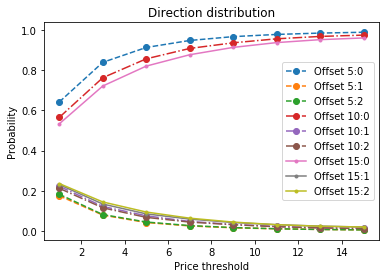

In [18]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [19]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.48148148 0.37037037 0.14814815]

Prior length:4 	0,1,2: [0.4691358  0.41975309 0.11111111]

Prior length:5 	0,1,2: [0.45679012 0.40329218 0.1399177 ]

Prior length:6 	0,1,2: [0.43895748 0.35939643 0.20164609]

Prior length:7 	0,1,2: [0.38545953 0.31595793 0.29858253]

Prior length:8 	0,1,2: [0.48209114 0.29157141 0.22633745]


In [20]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.48148148 0.40740741 0.11111111]

Prior length:4 	0,1,2: [0.5308642  0.38271605 0.08641975]

Prior length:5 	0,1,2: [0.43209877 0.41152263 0.1563786 ]

Prior length:6 	0,1,2: [0.40329218 0.35528121 0.24142661]

Prior length:7 	0,1,2: [0.40237769 0.32784636 0.26977595]

Prior length:8 	0,1,2: [0.61911294 0.20606615 0.17482091]


In [21]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.44444444 0.33333333 0.22222222]

Prior length:3 	0,1,2: [0.44444444 0.44444444 0.11111111]

Prior length:4 	0,1,2: [0.50617284 0.41975309 0.07407407]

Prior length:5 	0,1,2: [0.44855967 0.43209877 0.11934156]

Prior length:6 	0,1,2: [0.40192044 0.31550069 0.28257888]

Prior length:7 	0,1,2: [0.45770462 0.29949703 0.24279835]

Prior length:8 	0,1,2: [0.67032465 0.18000305 0.14967231]


# 3. Check the generated signal

In [22]:
params = AgConfig(frequency=5)

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [0.38443396 0.38404088 0.23152516]
Prior length:3 	0,1,2: [0.40290881 0.38469602 0.21239518]
Prior length:4 	0,1,2: [0.39688155 0.37827568 0.22484277]
Prior length:5 	0,1,2: [0.37631027 0.37434486 0.24934486]
Prior length:6 	0,1,2: [0.38063417 0.34735325 0.27201258]
Prior length:7 	0,1,2: [0.34722222 0.3370021  0.31577568]


In [23]:
params = AgConfig(frequency=10)

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [0.45663397 0.35260712 0.19075891]
Prior length:3 	0,1,2: [0.45921528 0.37454827 0.16623645]
Prior length:4 	0,1,2: [0.41894682 0.40836345 0.17268973]
Prior length:5 	0,1,2: [0.41662364 0.38538978 0.19798658]
Prior length:6 	0,1,2: [0.41817243 0.35105834 0.23076923]
Prior length:7 	0,1,2: [0.36886939 0.33118224 0.29994837]


In [24]:
params = AgConfig(frequency=15)

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [0.41917293 0.4037594  0.17706767]
Prior length:3 	0,1,2: [0.46992481 0.37368421 0.15639098]
Prior length:4 	0,1,2: [0.45413534 0.38120301 0.16466165]
Prior length:5 	0,1,2: [0.39887218 0.39135338 0.20977444]
Prior length:6 	0,1,2: [0.37293233 0.36353383 0.26353383]
Prior length:7 	0,1,2: [0.36278195 0.34962406 0.28759398]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.188806,0.002470,-0.001283,0.000678,0.000063,-0.063607,0.015776,-0.064559,0.528751,3.270985,2687,1.167982,0.685523
1,0.188806,0.002470,-0.001283,0.000678,0.000063,-0.063607,0.015776,-0.064559,0.528751,3.270985,2687,1.167982,0.685523
2,0.191804,0.002547,-0.001278,0.000678,0.000064,-0.063607,0.015776,-0.064277,0.530373,3.319541,2687,1.173183,0.685895
3,0.173488,0.001601,-0.001358,0.000704,0.000042,-0.063607,0.015776,-0.064277,0.518102,2.306964,2563,1.108862,0.650020
4,0.170428,-0.000528,-0.001283,0.000701,-0.000013,-0.063378,0.008666,-0.117211,0.546759,-0.774233,2730,0.964109,0.591575
5,0.193344,0.001905,-0.001196,0.000866,0.000052,-0.063378,0.011880,-0.081649,0.723621,2.463458,2513,1.129552,0.561082
6,0.184018,0.000294,-0.001171,0.000885,0.000008,-0.072893,0.015559,-0.133969,0.755341,0.399232,2418,1.019983,0.527295


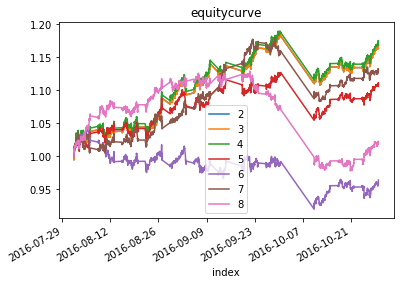

In [25]:
from config import AgConfig
params=BuConfig(frequency=5)

Ag_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5 )
Ag_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Ag_5_test.run()
Ag_5_test.plot()
Ag_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.169373,0.000417,-0.001894,0.000903,0.000019,-0.064111,0.015559,-0.069698,0.476915,0.614999,1461,1.028333,0.683094
1,0.182244,0.000375,-0.001757,0.000923,0.000015,-0.064111,0.015559,-0.069844,0.525182,0.515055,1657,1.025532,0.611949
2,0.170672,0.000669,-0.001626,0.000925,0.000026,-0.064111,0.015559,-0.068177,0.568778,0.979237,1755,1.045459,0.592023
3,0.192462,-0.000652,-0.001713,0.000983,-0.000029,-0.073122,0.015559,-0.094534,0.574172,-0.847241,1531,0.955647,0.568909
4,0.172335,-0.001246,-0.001685,0.001018,-0.000057,-0.073122,0.015559,-0.118792,0.603965,-1.807616,1492,0.915268,0.558981
5,0.182135,-0.000939,-0.001584,0.001102,-0.000044,-0.074355,0.016862,-0.130797,0.695485,-1.288759,1438,0.936154,0.539638
6,0.207510,-0.000309,-0.001497,0.001227,-0.000015,-0.073122,0.018851,-0.105759,0.819937,-0.371857,1371,0.979011,0.518600


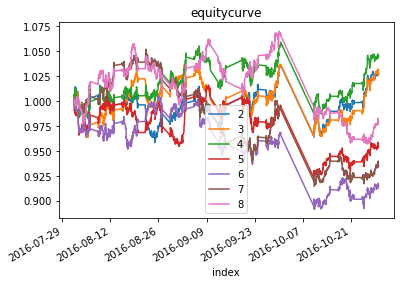

In [26]:
params=AgConfig(frequency=10)

Ag_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10 )
Ag_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Ag_10_test.run()
Ag_10_test.plot()
Ag_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.169875,-0.000907,-0.002492,0.001059,-0.000061,-0.066281,0.016862,-0.108804,0.425012,-1.334263,1009,0.938349,0.683845
1,0.169875,-0.000907,-0.002492,0.001059,-0.000061,-0.066281,0.016862,-0.108804,0.425012,-1.334263,1009,0.938349,0.683845
2,0.180231,-0.002629,-0.002734,0.001125,-0.000210,-0.070729,0.008499,-0.203032,0.411368,-3.646469,851,0.821239,0.641598
3,0.192872,-0.002153,-0.002311,0.001177,-0.000152,-0.070729,0.008997,-0.184228,0.509130,-2.791333,964,0.853563,0.584025
4,0.220255,-0.002100,-0.002100,0.001258,-0.000136,-0.070729,0.009892,-0.173977,0.598946,-2.383358,1047,0.857214,0.540592
5,0.201518,-0.000325,-0.002029,0.001481,-0.000024,-0.070975,0.016211,-0.076026,0.729764,-0.402648,926,0.977930,0.526998
6,0.188355,0.001349,-0.001814,0.001759,0.000114,-0.027278,0.065823,-0.059030,0.969876,1.790780,806,1.091746,0.511166


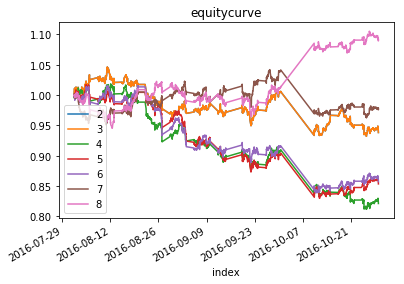

In [27]:
params=AgConfig(frequency=15)

Ag_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15 )
Ag_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Ag_15_test.run()
Ag_15_test.plot()
Ag_15_test.performance